# ARIMA Models in Python - Part 2

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

## Datasets

### Earthquake

In [4]:
earthquake_dataset = pd.read_csv('../datasets/time series/earthquakes.csv', index_col='date', parse_dates=True)

### Hospital

In [48]:
hospital_dataset = pd.read_csv('../datasets/time series/hospital.csv', index_col=0, parse_dates=True)

### Amazon Close

In [71]:
amazon_dataset = pd.read_csv('../datasets/time series/amazon_close.csv', index_col='date', parse_dates=['date'])
amazon_dataset = amazon_dataset.iloc[::-1]

## Fitting the Future
What lies ahead in this chapter is you predicting what lies ahead in your data. You'll learn how to use the elegant statsmodels package to fit ARMA, ARIMA and ARMAX models. Then you'll use your models to predict the uncertain future of stock prices!

### Fitting AR and MA models
In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the `arma_generate_sample()` function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a `pandas` DataFrame available in your environment called `sample`. It has two columns of different time series data.

In [39]:
earthquake = earthquake_dataset.copy()[['earthquakes_per_year']]

- Fit an AR(2) model to the `'timeseries_1'` column of `sample`.
- Print a summary of the fitted model.

In [40]:
# Instantiate the model
model = ARMA(earthquake, order=(2, 0))

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [41]:
# Fit the model
results = model.fit()

In [42]:
# Print summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(2, 0)   Log Likelihood                -317.367
Method:                         css-mle   S.D. of innovations              5.958
Date:                  Wed, 29 Dec 2021   AIC                            642.734
Time:                          22:10:52   BIC                            653.114
Sample:                      01-01-1900   HQIC                           646.934
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.8146      1.563     12.674      0.000      16.750      22.879
ar.L1.earthquakes_per_year     0.4457      0.098      4.528      0.

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_1' data?

In [43]:
ar_coefs = [1, -0.4, -0.2]
ma_coefs = [1]

- Fit an MA(3) model to the `'timeseries_2'` column of `sample`.

In [44]:
# Instantiate the model
model = ARMA(earthquake, order=(0, 3))

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [45]:
# Fit the model
results = model.fit()

In [46]:
# Print summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(0, 3)   Log Likelihood                -318.965
Method:                         css-mle   S.D. of innovations              6.056
Date:                  Wed, 29 Dec 2021   AIC                            647.931
Time:                          22:10:56   BIC                            660.906
Sample:                      01-01-1900   HQIC                           653.181
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.9295      1.152     17.297      0.000      17.671      22.188
ma.L1.earthquakes_per_year     0.3982      0.102      3.913      0.

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_2' data?

In [47]:
ar_coefs = [1]
ma_coefs = [1, 0.4, 0.2, 0.3]

### Fitting an ARMA model
In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.



The earthquakes dataset is available in your environment as earthquake. The ARMA class is also available in your environment.

In [32]:
earthquake = earthquake_dataset.copy()[['earthquakes_per_year']]

In [33]:
# Instantiate the model
model = ARMA(earthquake, order=(3, 1))

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [34]:
# Fit the model
results = model.fit()

In [35]:
# Print model fit summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Wed, 29 Dec 2021   AIC                            643.345
Time:                          22:06:49   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

### Fitting an ARMAX model
In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.



This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as hospital and has the two columns mentioned above. The ARMA class is also available for you.

In [50]:
hospital = hospital_dataset.copy()

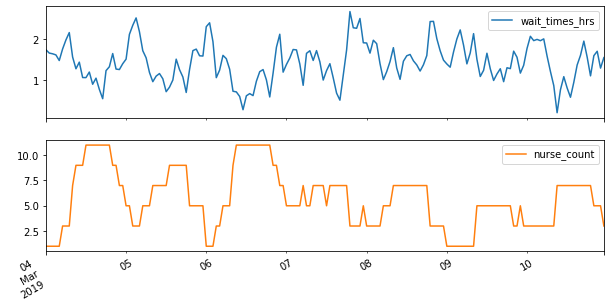

In [52]:
hospital.plot(subplots=True, figsize=(10, 5));

In [53]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2, 1), exog=hospital['nurse_count'])

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [54]:
# Fit the model
results = model.fit()

In [55]:
# Print model fit summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Wed, 29 Dec 2021   AIC                             35.668
Time:                        22:31:30   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

### Generating one-step-ahead predictions
It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results.

In [110]:
amazon = amazon_dataset.copy()
amazon = amazon.loc['2018':]

In [111]:
model = SARIMAX(amazon, order=(3, 1, 3), seasonal_order=(1, 0, 1, 7), trend='c')
results = model.fit()

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [112]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

In [113]:
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

In [114]:
# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

In [115]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

In [116]:
# Print best estimate  predictions
print(mean_forecast)

date
2018-12-27    1476.606140
2018-12-28    1462.160232
2018-12-31    1468.406067
2019-01-02    1497.953818
2019-01-03    1539.545952
2019-01-04    1509.834297
2019-01-07    1581.600965
2019-01-08    1629.539162
2019-01-09    1647.120393
2019-01-10    1648.161638
2019-01-11    1655.134472
2019-01-14    1651.871752
2019-01-15    1625.445592
2019-01-16    1672.506518
2019-01-17    1672.079718
2019-01-18    1681.349076
2019-01-22    1690.564252
2019-01-23    1641.608687
2019-01-24    1658.569467
2019-01-25    1654.768466
2019-01-28    1660.452068
2019-01-29    1620.777729
2019-01-30    1589.031447
2019-01-31    1679.813462
2019-02-01    1727.076124
2019-02-04    1633.137468
2019-02-05    1633.766730
2019-02-06    1647.603501
2019-02-07    1633.476070
2019-02-08    1606.502562
dtype: float64


### Plotting one-step-ahead predictions
Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment.

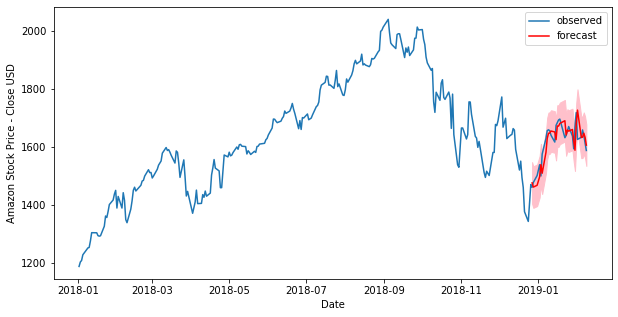

In [117]:
plt.figure(figsize=(10, 5))

# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits,
		 color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts
Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [118]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

In [119]:
# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

In [120]:
# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

In [121]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

In [122]:
# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1476.606140
2018-12-28    1477.038578
2018-12-31    1466.524392
2019-01-02    1464.247119
2019-01-03    1466.706134
2019-01-04    1478.520442
2019-01-07    1479.598638
2019-01-08    1482.602967
2019-01-09    1472.809493
2019-01-10    1468.202641
2019-01-11    1466.008482
2019-01-14    1475.944459
2019-01-15    1481.803499
2019-01-16    1483.789144
2019-01-17    1476.739260
2019-01-18    1470.806852
2019-01-22    1466.822314
2019-01-23    1473.149112
2019-01-24    1479.533447
2019-01-25    1484.285281
2019-01-28    1478.609691
2019-01-29    1472.814028
2019-01-30    1467.471681
2019-01-31    1471.304572
2019-02-01    1476.913830
2019-02-04    1482.641845
2019-02-05    1479.831318
2019-02-06    1474.190502
2019-02-07    1468.222210
2019-02-08    1469.786536
dtype: float64


### Plotting dynamic forecasts
Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.

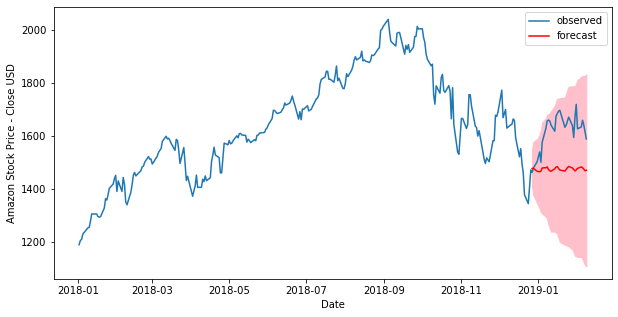

In [123]:
plt.figure(figsize=(10, 5))

# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Differencing and fitting ARMA
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series in available in your environment as amazon. The SARIMAX model class is also available in your environment.

In [124]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

In [125]:
# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2, 0, 2))

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [126]:
# Fit model
arma_results = arma.fit()

In [127]:
# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  277
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1388.657
Date:                Wed, 29 Dec 2021   AIC                           2787.314
Time:                        23:50:10   BIC                           2805.434
Sample:                             0   HQIC                          2794.584
                                - 277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6525      0.033     50.775      0.000       1.589       1.716
ar.L2         -0.9198      0.031    -29.502      0.000      -0.981      -0.859
ma.L1         -1.7008      1.381     -1.231      0.2

### Unrolling ARMA forecast
Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

In [128]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [129]:
# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

In [130]:
# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

In [131]:
# Print forecast
print(arma_value_forecast)

277    1595.631946
278    1594.892494
279    1586.853066
280    1574.248364
281    1560.814240
282    1550.208667
283    1545.040070
284    1546.254168
285    1553.014496
286    1563.068956
dtype: float64


### Fitting an ARIMA model
In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the SARIMAX model class.

In [132]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [133]:
# Fit ARIMA model
arima_results = arima.fit()

In [134]:
# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [135]:
# Print forecast
print(arima_value_forecast)

278    1595.650787
279    1594.919463
280    1586.876751
281    1574.259701
282    1560.808542
283    1550.186246
284    1545.005474
285    1546.214430
286    1552.976977
287    1563.039411
dtype: float64
